In [99]:
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv('Base.csv')

In [45]:
spx_df = df[['SPX Index ']].copy()
vix_df = df[['VIX Index  (L1)']].copy()
fred_df = df[['Freddie Mac 30 Year Mortgage Rate']].copy()
trea_df = df[['U.S. 5-year Treasury constant maturity rate']].copy()
hy_df = df[['CDX HY Spread']].copy()
ig_df = df[['CDX IG Spread']].copy()

# SPX

<AxesSubplot:>

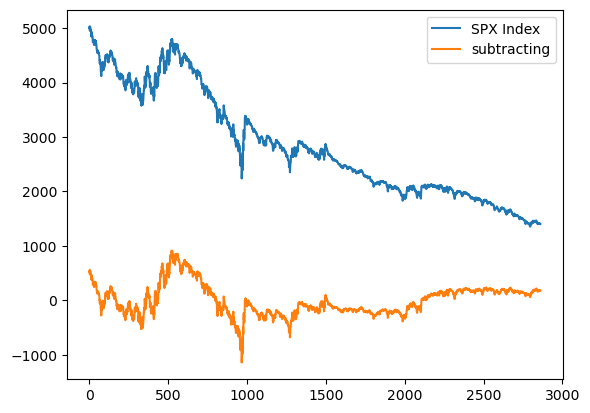

In [46]:
trend_model = np.polyfit(x=np.arange(len(spx_df)), y=spx_df['SPX Index '], deg=1)

trend = np.polyval(p=trend_model, x=np.arange(len(spx_df)))

spx_df['subtracting'] = spx_df['SPX Index '] - trend

spx_df[['SPX Index ', 'subtracting']].plot()

<AxesSubplot:>

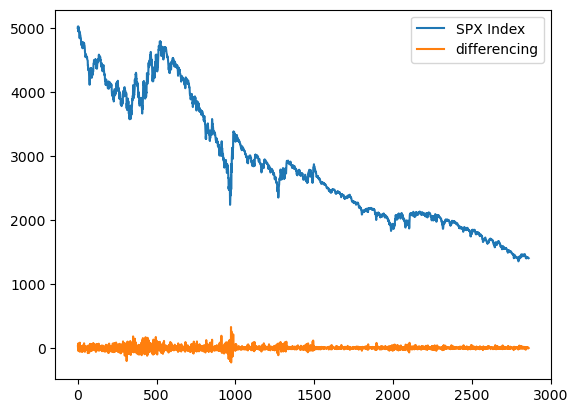

In [47]:
spx_df['differencing'] = spx_df['SPX Index '].diff()

# For second-order differencing, you could do a diff of the diff:
# df['second_order_diff'] = df['value'].diff().diff()

# Plotting (optional)
spx_df[['SPX Index ', 'differencing']].plot()


<AxesSubplot:>

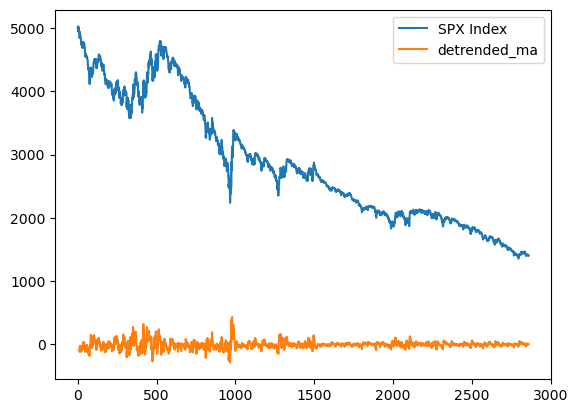

In [48]:
window = 12  # Adjust based on your dataset
spx_df['moving_avg'] = spx_df['SPX Index '].rolling(window=window).mean()

spx_df['detrended_ma'] = spx_df['SPX Index '] - spx_df['moving_avg']

spx_df[['SPX Index ', 'detrended_ma']].plot()

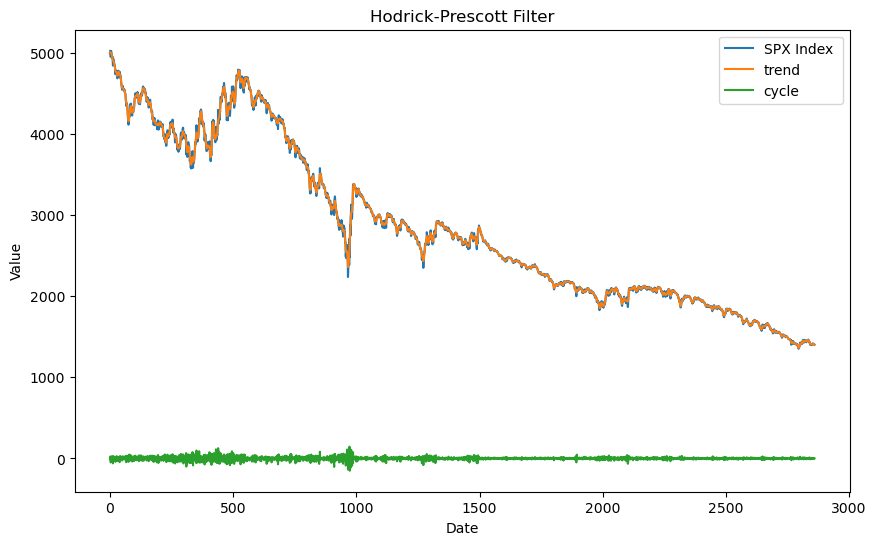

In [107]:
cycle, trend = sm.tsa.filters.hpfilter(spx_df['SPX Index '], lamb=6.25)
#1600 for quarterly, 6400 for annual, and around 6.25 for monthly data.

# Adding the results back to the DataFrame
spx_df['trend'] = trend
spx_df['cycle'] = cycle

# You can plot the original data, the trend, and the cycle
spx_df[['SPX Index ', 'trend', 'cycle']].plot(figsize=(10, 6), title='Hodrick-Prescott Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

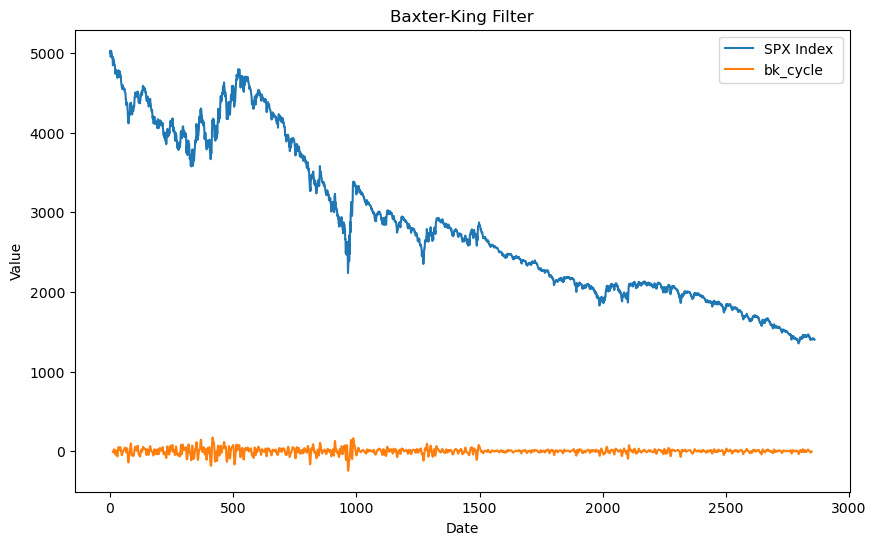

In [111]:
# Baxter-King filter to extract cyclical movements
bk_cycle = sm.tsa.filters.bkfilter(spx_df['SPX Index '], low=6, high=32, K=12)

# The BK filter returns an array, so let's add it back to the DataFrame
spx_df['bk_cycle'] = bk_cycle

# Plot the original data and the extracted cycle
spx_df[['SPX Index ', 'bk_cycle']].plot(figsize=(10, 6), title='Baxter-King Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [108]:
spx_df

,SPX Index,subtracting,differencing,moving_avg,detrended_ma,trend,cycle
0,5005.57,525.034351,NaN,NaN,NaN,5011.305982,-5.735982
1,5029.73,550.334180,24.16,NaN,NaN,5008.464154,21.265846
2,5000.62,522.364008,-29.11,NaN,NaN,5004.704569,-4.084569
3,4953.17,476.053837,-47.45,NaN,NaN,5002.512005,-49.342005
4,5021.84,545.863665,68.67,NaN,NaN,5003.717709,18.122291
...,...,...,...,...,...,...,...
2856,1405.53,180.344594,-9.98,1410.575833,-5.045833,1409.743467,-4.213467
2857,1403.93,179.884422,-1.60,1410.946667,-7.016667,1407.278605,-3.348605
2858,1404.11,181.204251,0.18,1410.415000,-6.305000,1405.387584,-1.277584
2859,1405.87,184.104079,1.76,1410.129167,-4.259167,1403.910914,1.959086


In [140]:
spx_df=spx_df.dropna()

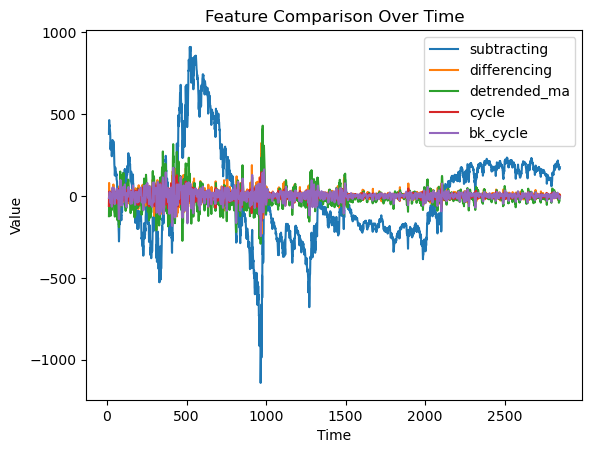

In [142]:
plt.plot(spx_df.index, spx_df['subtracting'], label='subtracting')
plt.plot(spx_df.index, spx_df['differencing'], label='differencing')
plt.plot(spx_df.index, spx_df['detrended_ma'], label='detrended_ma')
plt.plot(spx_df.index, spx_df['cycle'], label='cycle')
plt.plot(spx_df.index, spx_df['bk_cycle'], label='bk_cycle')
plt.title('Feature Comparison Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [143]:
from statsmodels.tsa.stattools import adfuller

In [144]:
dickey=adfuller(spx_df['SPX Index '])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.337442
p-value: 0.611873
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [145]:
dickey=adfuller(spx_df['subtracting'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.019369
p-value: 0.033125
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [146]:
dickey=adfuller(spx_df['differencing'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.614810
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [147]:
dickey=adfuller(spx_df['detrended_ma'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.729097
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [148]:
dickey=adfuller(spx_df['cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -24.321097
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [149]:
dickey=adfuller(spx_df['bk_cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.676107
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


# VIX

<AxesSubplot:>

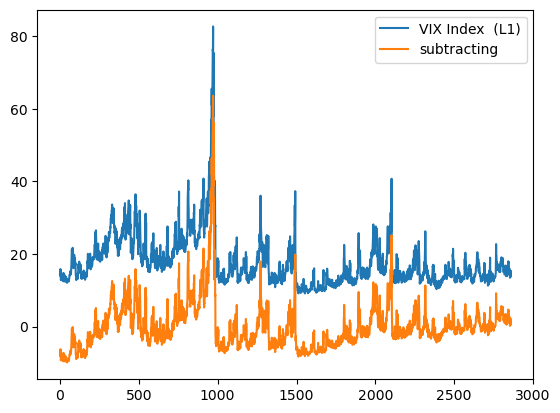

In [52]:
trend_model = np.polyfit(x=np.arange(len(spx_df)), y=vix_df['VIX Index  (L1)'], deg=1)

trend = np.polyval(p=trend_model, x=np.arange(len(vix_df)))

vix_df['subtracting'] = vix_df['VIX Index  (L1)'] - trend

vix_df[['VIX Index  (L1)', 'subtracting']].plot()

<AxesSubplot:>

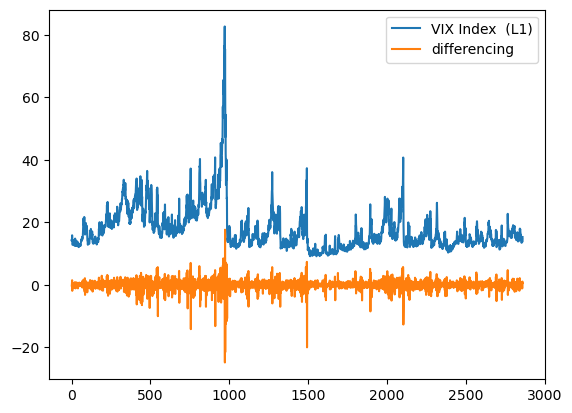

In [62]:
vix_df['differencing'] = vix_df['VIX Index  (L1)'].diff()

# For second-order differencing, you could do a diff of the diff:
# df['second_order_diff'] = df['value'].diff().diff()

# Plotting (optional)
vix_df[['VIX Index  (L1)', 'differencing']].plot()


<AxesSubplot:>

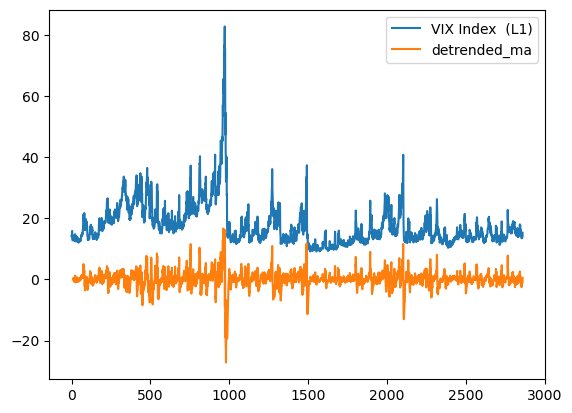

In [63]:
window = 12  # Adjust based on your dataset
vix_df['moving_avg'] = vix_df['VIX Index  (L1)'].rolling(window=window).mean()

vix_df['detrended_ma'] = vix_df['VIX Index  (L1)'] - vix_df['moving_avg']

vix_df[['VIX Index  (L1)', 'detrended_ma']].plot()

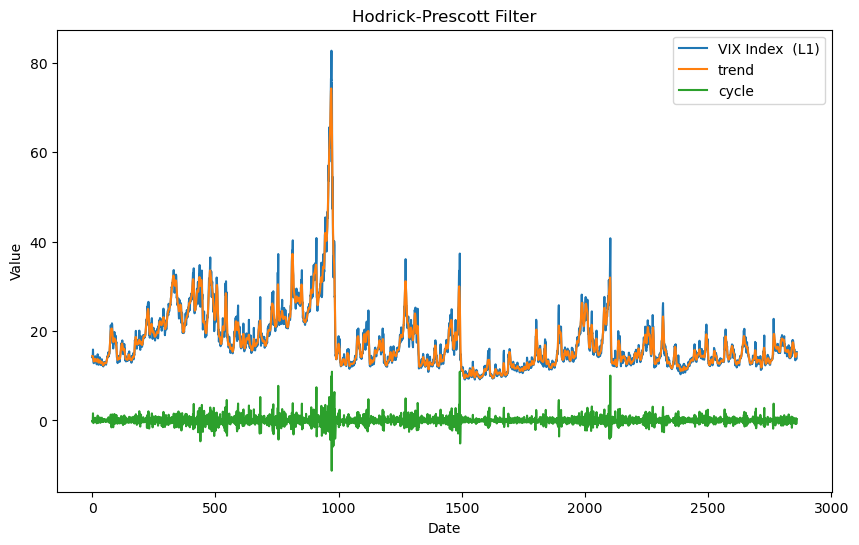

In [114]:
cycle, trend = sm.tsa.filters.hpfilter(vix_df['VIX Index  (L1)'], lamb=6.25)
#1600 for quarterly, 6400 for annual, and around 6.25 for monthly data.

# Adding the results back to the DataFrame
vix_df['trend'] = trend
vix_df['cycle'] = cycle

# You can plot the original data, the trend, and the cycle
vix_df[['VIX Index  (L1)', 'trend', 'cycle']].plot(figsize=(10, 6), title='Hodrick-Prescott Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

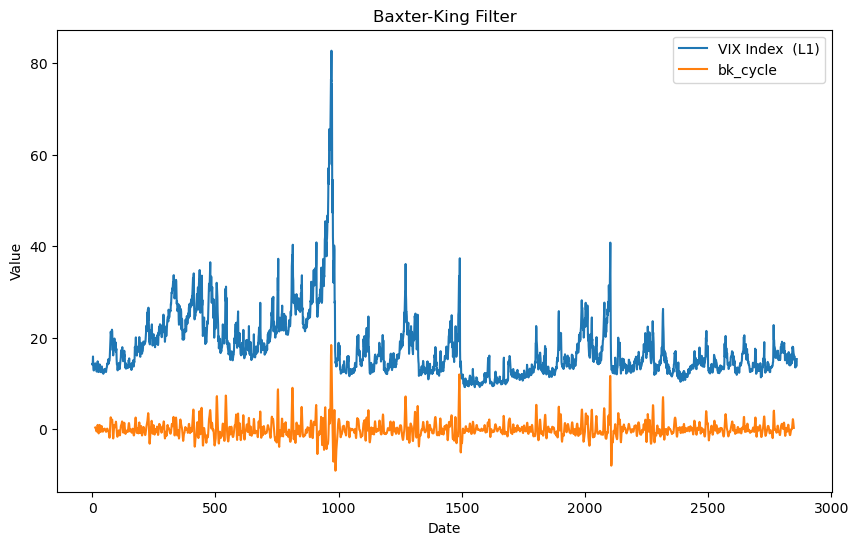

In [115]:
# Baxter-King filter to extract cyclical movements
bk_cycle = sm.tsa.filters.bkfilter(vix_df['VIX Index  (L1)'], low=6, high=32, K=12)

# The BK filter returns an array, so let's add it back to the DataFrame
vix_df['bk_cycle'] = bk_cycle

# Plot the original data and the extracted cycle
vix_df[['VIX Index  (L1)', 'bk_cycle']].plot(figsize=(10, 6), title='Baxter-King Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [64]:
vix_df

,VIX Index (L1),subtracting,differencing,moving_avg,detrended_ma
0,14.24,-7.858236,NaN,NaN,NaN
1,14.01,-8.085138,-0.23,NaN,NaN
2,14.38,-7.712040,0.37,NaN,NaN
3,15.85,-6.238942,1.47,NaN,NaN
4,13.93,-8.155844,-1.92,NaN,NaN
...,...,...,...,...,...
2856,14.63,1.379409,0.34,15.449167,-0.819167
2857,14.85,1.602507,0.22,15.200833,-0.350833
2858,13.70,0.455605,-1.15,14.920833,-1.220833
2859,14.74,1.498703,1.04,14.775000,-0.035000


In [150]:
vix_df=vix_df.dropna()

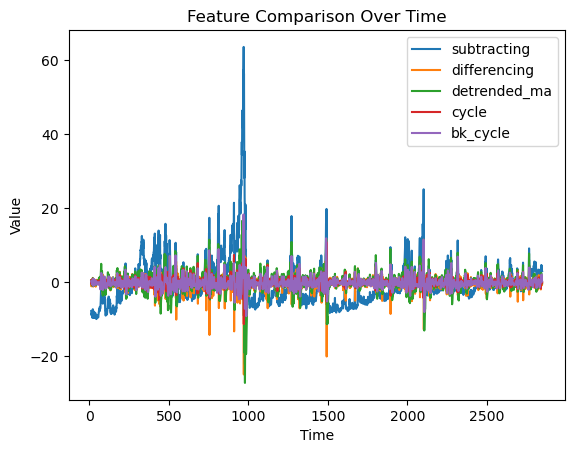

In [151]:
plt.plot(vix_df.index, vix_df['subtracting'], label='subtracting')
plt.plot(vix_df.index, vix_df['differencing'], label='differencing')
plt.plot(vix_df.index, vix_df['detrended_ma'], label='detrended_ma')
plt.plot(vix_df.index, vix_df['cycle'], label='cycle')
plt.plot(vix_df.index, vix_df['bk_cycle'], label='bk_cycle')
plt.title('Feature Comparison Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [152]:
dickey=adfuller(vix_df['VIX Index  (L1)'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.595414
p-value: 0.000001
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [153]:
dickey=adfuller(vix_df['subtracting'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.155528
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [154]:
dickey=adfuller(vix_df['differencing'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.276531
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [155]:
dickey=adfuller(vix_df['detrended_ma'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.287082
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [156]:
dickey=adfuller(vix_df['cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.721072
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [157]:
dickey=adfuller(vix_df['bk_cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.559374
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


# Freddie

<AxesSubplot:>

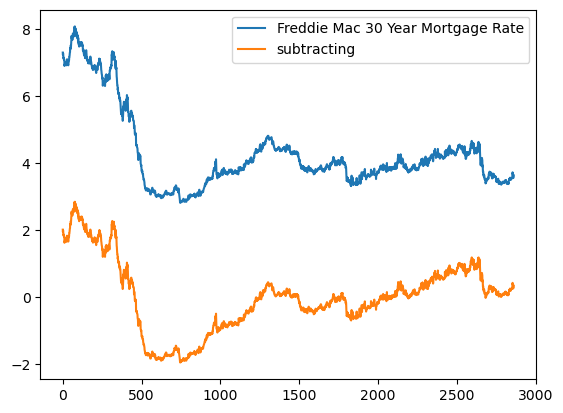

In [68]:
trend_model = np.polyfit(x=np.arange(len(fred_df)), y=fred_df['Freddie Mac 30 Year Mortgage Rate'], deg=1)

trend = np.polyval(p=trend_model, x=np.arange(len(fred_df)))

fred_df['subtracting'] = fred_df['Freddie Mac 30 Year Mortgage Rate'] - trend

fred_df[['Freddie Mac 30 Year Mortgage Rate', 'subtracting']].plot()

<AxesSubplot:>

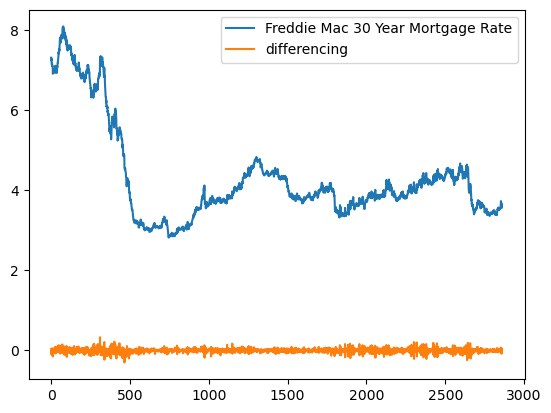

In [69]:
fred_df['differencing'] = fred_df['Freddie Mac 30 Year Mortgage Rate'].diff()

# For second-order differencing, you could do a diff of the diff:
# df['second_order_diff'] = df['value'].diff().diff()

# Plotting (optional)
fred_df[['Freddie Mac 30 Year Mortgage Rate', 'differencing']].plot()


<AxesSubplot:>

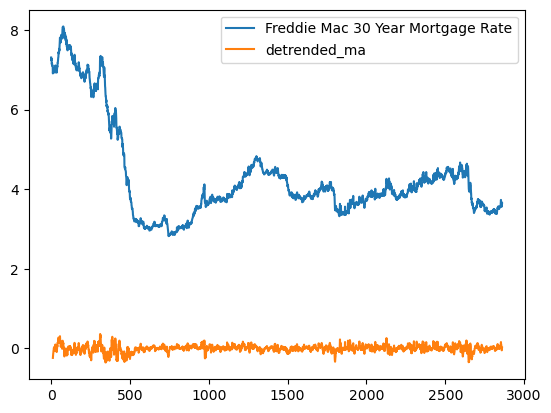

In [70]:
window = 12  # Adjust based on your dataset
fred_df['moving_avg'] = fred_df['Freddie Mac 30 Year Mortgage Rate'].rolling(window=window).mean()

fred_df['detrended_ma'] = fred_df['Freddie Mac 30 Year Mortgage Rate'] - fred_df['moving_avg']

fred_df[['Freddie Mac 30 Year Mortgage Rate', 'detrended_ma']].plot()

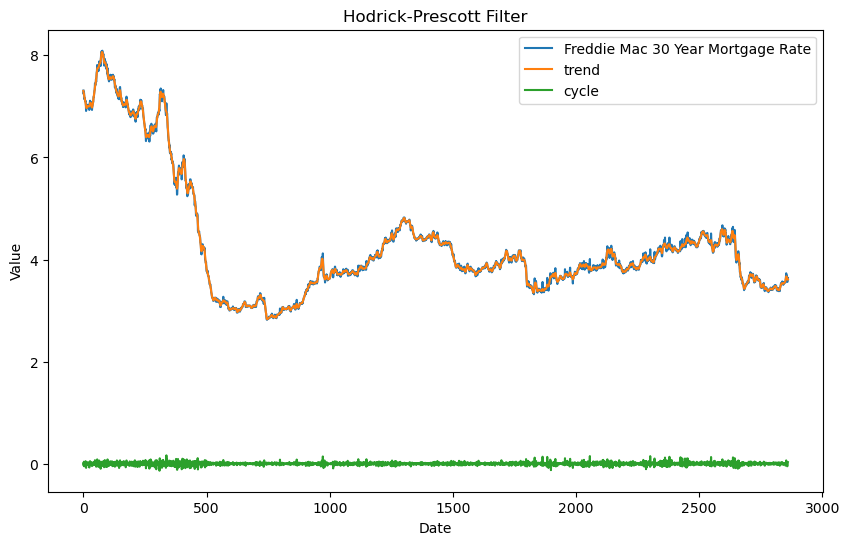

In [117]:
cycle, trend = sm.tsa.filters.hpfilter(fred_df['Freddie Mac 30 Year Mortgage Rate'], lamb=6.25)
#1600 for quarterly, 6400 for annual, and around 6.25 for monthly data.

# Adding the results back to the DataFrame
fred_df['trend'] = trend
fred_df['cycle'] = cycle

# You can plot the original data, the trend, and the cycle
fred_df[['Freddie Mac 30 Year Mortgage Rate', 'trend', 'cycle']].plot(figsize=(10, 6), title='Hodrick-Prescott Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

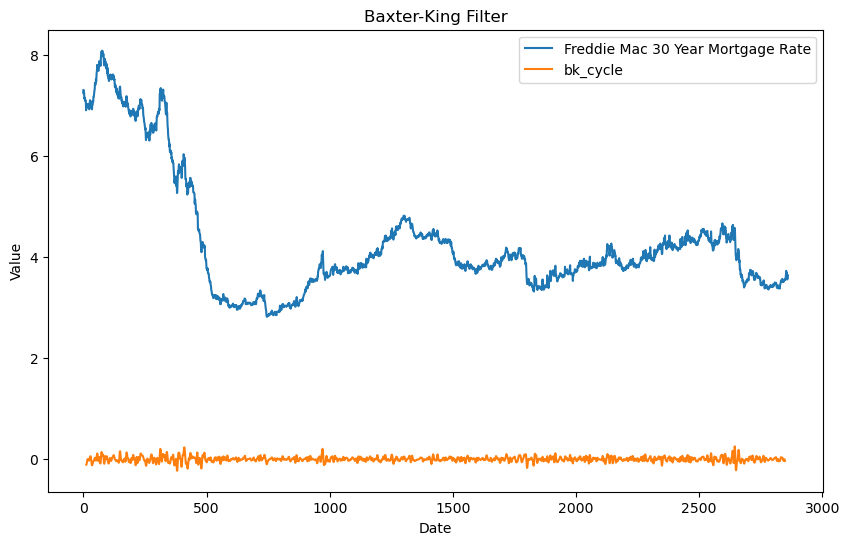

In [119]:
# Baxter-King filter to extract cyclical movements
bk_cycle = sm.tsa.filters.bkfilter(fred_df['Freddie Mac 30 Year Mortgage Rate'], low=6, high=32, K=12)

# The BK filter returns an array, so let's add it back to the DataFrame
fred_df['bk_cycle'] = bk_cycle

# Plot the original data and the extracted cycle
fred_df[['Freddie Mac 30 Year Mortgage Rate', 'bk_cycle']].plot(figsize=(10, 6), title='Baxter-King Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [87]:
fred_df

,Freddie Mac 30 Year Mortgage Rate,subtracting,differencing,moving_avg,detrended_ma
0,7.31,2.017228,NaN,NaN,NaN
1,7.24,1.947925,-0.07,NaN,NaN
2,7.29,1.998623,0.05,NaN,NaN
3,7.25,1.959320,-0.04,NaN,NaN
4,7.14,1.850017,-0.11,NaN,NaN
...,...,...,...,...,...
2856,3.65,0.349056,-0.04,3.610000,0.040000
2857,3.57,0.269754,-0.08,3.611667,-0.041667
2858,3.56,0.260451,-0.01,3.611667,-0.051667
2859,3.61,0.311149,0.05,3.616667,-0.006667


In [158]:
fred_df=fred_df.dropna()

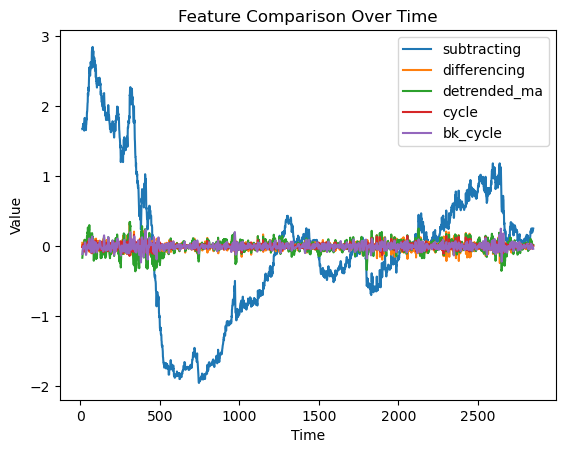

In [159]:
plt.plot(fred_df.index, fred_df['subtracting'], label='subtracting')
plt.plot(fred_df.index, fred_df['differencing'], label='differencing')
plt.plot(fred_df.index, fred_df['detrended_ma'], label='detrended_ma')
plt.plot(fred_df.index, fred_df['cycle'], label='cycle')
plt.plot(fred_df.index, fred_df['bk_cycle'], label='bk_cycle')
plt.title('Feature Comparison Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [160]:
dickey=adfuller(fred_df['Freddie Mac 30 Year Mortgage Rate'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.276677
p-value: 0.179600
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [161]:
dickey=adfuller(fred_df['subtracting'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.878700
p-value: 0.342147
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [162]:
dickey=adfuller(fred_df['differencing'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.736948
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [163]:
dickey=adfuller(fred_df['detrended_ma'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.883439
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [164]:
dickey=adfuller(fred_df['cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.944647
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [165]:
dickey=adfuller(fred_df['bk_cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.867587
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


# Treasure

<AxesSubplot:>

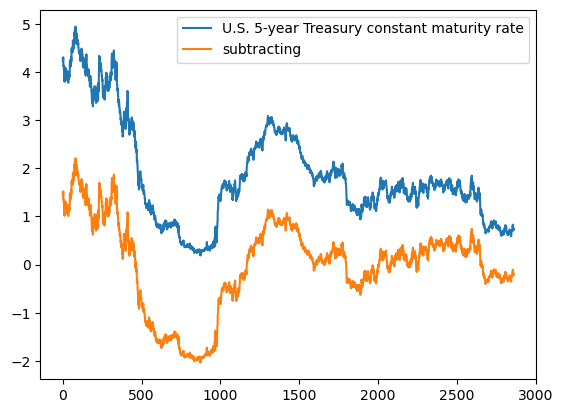

In [71]:
trend_model = np.polyfit(x=np.arange(len(trea_df)), y=trea_df['U.S. 5-year Treasury constant maturity rate'], deg=1)

trend = np.polyval(p=trend_model, x=np.arange(len(trea_df)))

trea_df['subtracting'] = trea_df['U.S. 5-year Treasury constant maturity rate'] - trend

trea_df[['U.S. 5-year Treasury constant maturity rate', 'subtracting']].plot()

<AxesSubplot:>

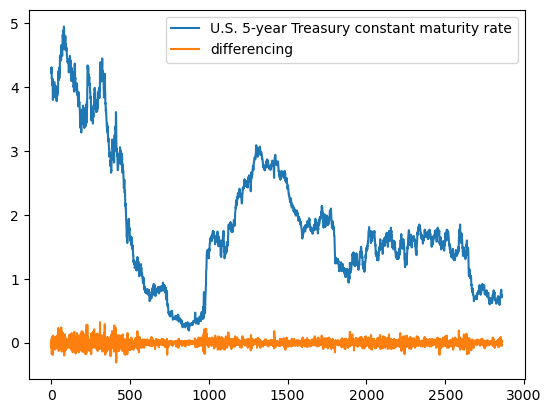

In [72]:
trea_df['differencing'] = trea_df['U.S. 5-year Treasury constant maturity rate'].diff()

# For second-order differencing, you could do a diff of the diff:
# df['second_order_diff'] = df['value'].diff().diff()

# Plotting (optional)
trea_df[['U.S. 5-year Treasury constant maturity rate', 'differencing']].plot()


<AxesSubplot:>

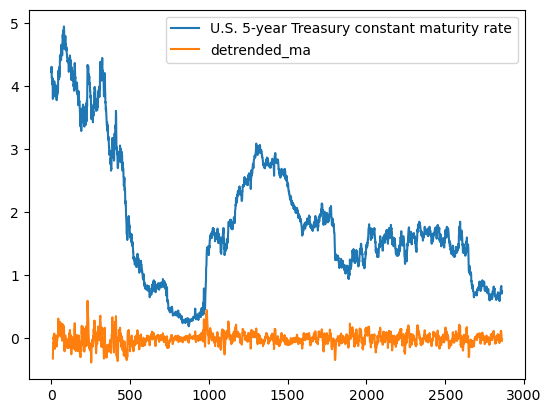

In [73]:
window = 12  # Adjust based on your dataset
trea_df['moving_avg'] = trea_df['U.S. 5-year Treasury constant maturity rate'].rolling(window=window).mean()

trea_df['detrended_ma'] = trea_df['U.S. 5-year Treasury constant maturity rate'] - trea_df['moving_avg']

trea_df[['U.S. 5-year Treasury constant maturity rate', 'detrended_ma']].plot()

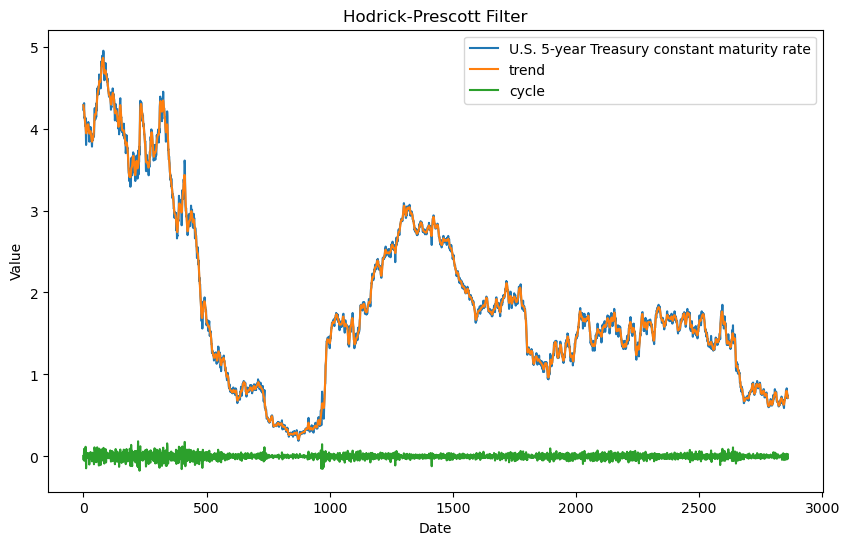

In [121]:
cycle, trend = sm.tsa.filters.hpfilter(trea_df['U.S. 5-year Treasury constant maturity rate'], lamb=6.25)
#1600 for quarterly, 6400 for annual, and around 6.25 for monthly data.

# Adding the results back to the DataFrame
trea_df['trend'] = trend
trea_df['cycle'] = cycle

# You can plot the original data, the trend, and the cycle
trea_df[['U.S. 5-year Treasury constant maturity rate', 'trend', 'cycle']].plot(figsize=(10, 6), title='Hodrick-Prescott Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

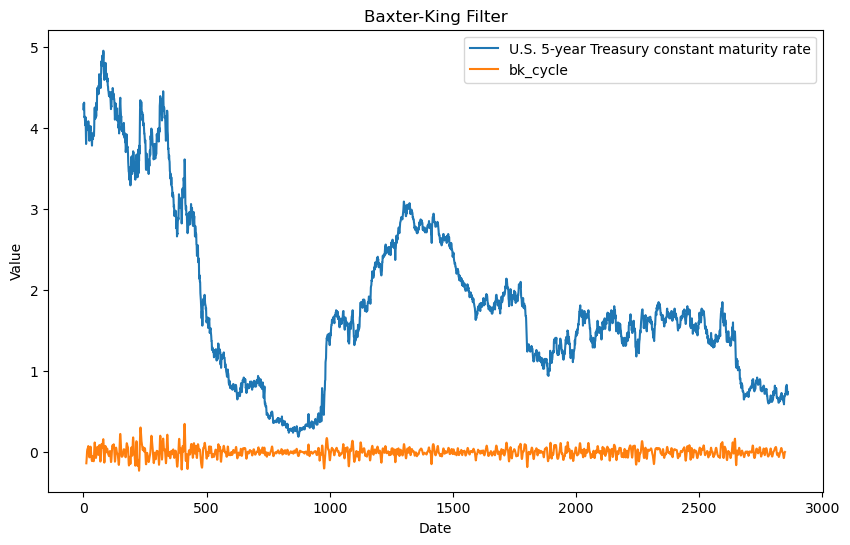

In [122]:
# Baxter-King filter to extract cyclical movements
bk_cycle = sm.tsa.filters.bkfilter(trea_df['U.S. 5-year Treasury constant maturity rate'], low=6, high=32, K=12)

# The BK filter returns an array, so let's add it back to the DataFrame
trea_df['bk_cycle'] = bk_cycle

# Plot the original data and the extracted cycle
trea_df[['U.S. 5-year Treasury constant maturity rate', 'bk_cycle']].plot(figsize=(10, 6), title='Baxter-King Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [90]:
trea_df

,U.S. 5-year Treasury constant maturity rate,subtracting,differencing,moving_avg,detrended_ma
0,4.29,1.498697,NaN,NaN,NaN
1,4.22,1.429347,-0.07,NaN,NaN
2,4.25,1.459996,0.03,NaN,NaN
3,4.31,1.520645,0.06,NaN,NaN
4,4.13,1.341294,-0.18,NaN,NaN
...,...,...,...,...,...
2856,0.80,-0.137138,-0.03,0.743333,0.056667
2857,0.75,-0.186489,-0.05,0.750833,-0.000833
2858,0.71,-0.225840,-0.04,0.752500,-0.042500
2859,0.71,-0.225191,0.00,0.754167,-0.044167


In [166]:
trea_df=trea_df.dropna()

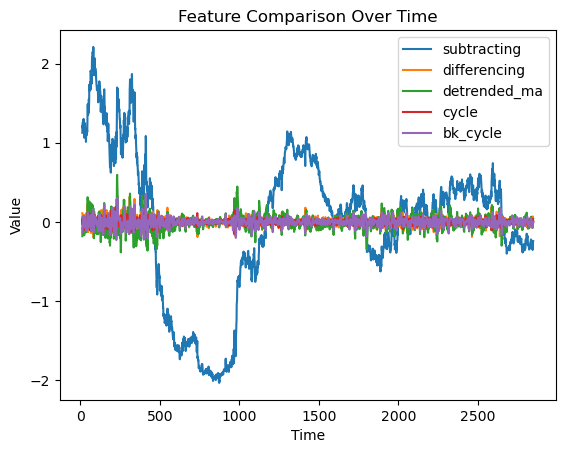

In [167]:
plt.plot(trea_df.index, trea_df['subtracting'], label='subtracting')
plt.plot(trea_df.index, trea_df['differencing'], label='differencing')
plt.plot(trea_df.index, trea_df['detrended_ma'], label='detrended_ma')
plt.plot(trea_df.index, trea_df['cycle'], label='cycle')
plt.plot(trea_df.index, trea_df['bk_cycle'], label='bk_cycle')
plt.title('Feature Comparison Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [168]:
dickey=adfuller(trea_df['U.S. 5-year Treasury constant maturity rate'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.736951
p-value: 0.412182
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [169]:
dickey=adfuller(trea_df['subtracting'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.671919
p-value: 0.445636
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [170]:
dickey=adfuller(trea_df['differencing'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.634327
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [171]:
dickey=adfuller(trea_df['detrended_ma'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.634270
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [172]:
dickey=adfuller(trea_df['cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -24.434636
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [173]:
dickey=adfuller(trea_df['bk_cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.655661
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


# HY

<AxesSubplot:>

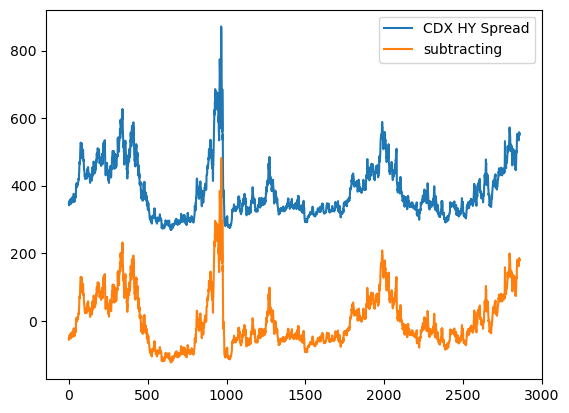

In [74]:
trend_model = np.polyfit(x=np.arange(len(hy_df)), y=hy_df['CDX HY Spread'], deg=1)

trend = np.polyval(p=trend_model, x=np.arange(len(hy_df)))

hy_df['subtracting'] = hy_df['CDX HY Spread'] - trend

hy_df[['CDX HY Spread', 'subtracting']].plot()

<AxesSubplot:>

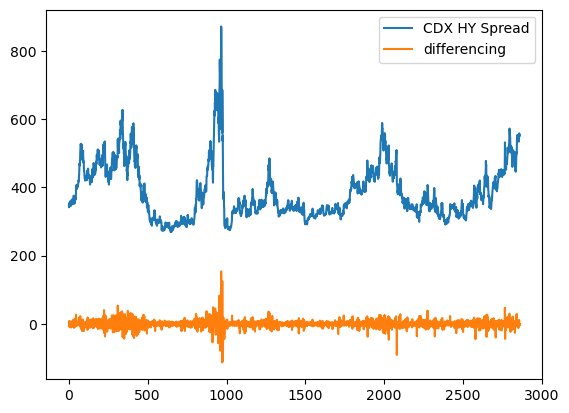

In [75]:
hy_df['differencing'] = hy_df['CDX HY Spread'].diff()

# For second-order differencing, you could do a diff of the diff:
# df['second_order_diff'] = df['value'].diff().diff()

# Plotting (optional)
hy_df[['CDX HY Spread', 'differencing']].plot()


<AxesSubplot:>

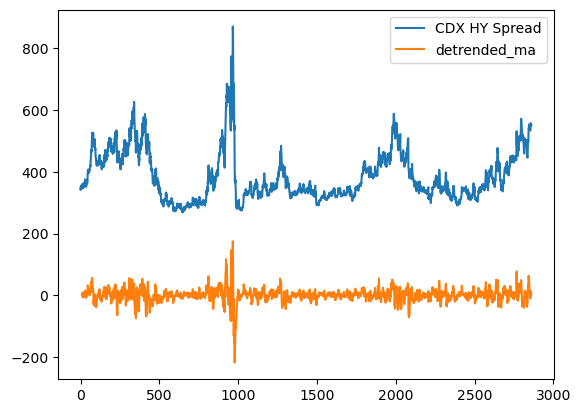

In [76]:
window = 12  # Adjust based on your dataset
hy_df['moving_avg'] = hy_df['CDX HY Spread'].rolling(window=window).mean()

hy_df['detrended_ma'] = hy_df['CDX HY Spread'] - hy_df['moving_avg']

hy_df[['CDX HY Spread', 'detrended_ma']].plot()

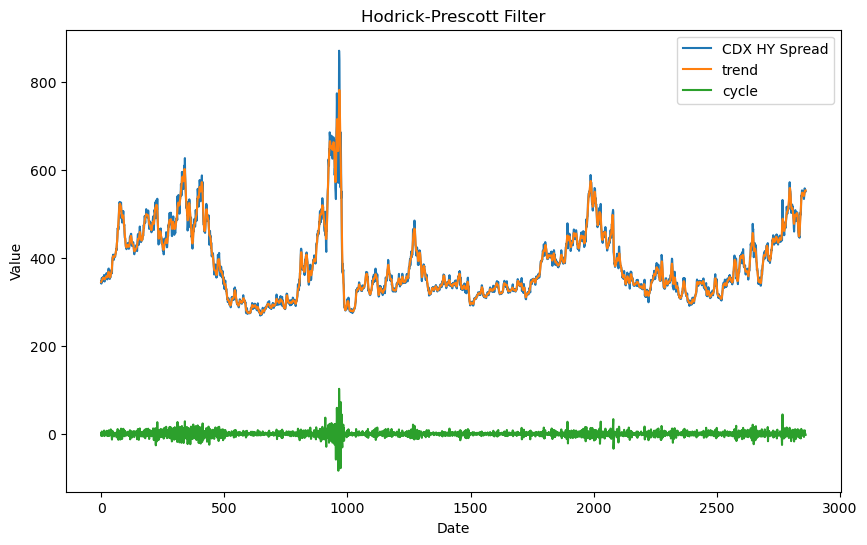

In [124]:
cycle, trend = sm.tsa.filters.hpfilter(hy_df['CDX HY Spread'], lamb=6.25)
#1600 for quarterly, 6400 for annual, and around 6.25 for monthly data.

# Adding the results back to the DataFrame
hy_df['trend'] = trend
hy_df['cycle'] = cycle

# You can plot the original data, the trend, and the cycle
hy_df[['CDX HY Spread', 'trend', 'cycle']].plot(figsize=(10, 6), title='Hodrick-Prescott Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

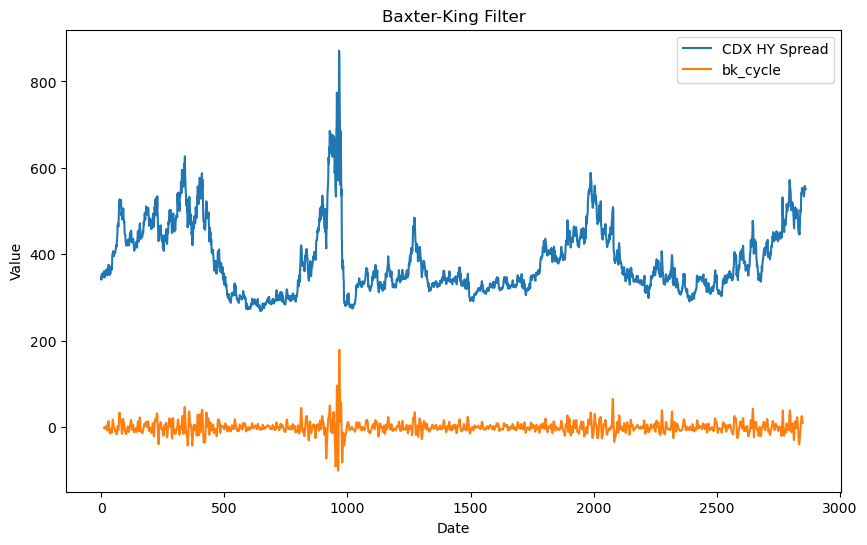

In [125]:
# Baxter-King filter to extract cyclical movements
bk_cycle = sm.tsa.filters.bkfilter(hy_df['CDX HY Spread'], low=6, high=32, K=12)

# The BK filter returns an array, so let's add it back to the DataFrame
hy_df['bk_cycle'] = bk_cycle

# Plot the original data and the extracted cycle
hy_df[['CDX HY Spread', 'bk_cycle']].plot(figsize=(10, 6), title='Baxter-King Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [93]:
hy_df

,CDX HY Spread,subtracting,differencing,moving_avg,detrended_ma
0,346.692,-51.511718,NaN,NaN,NaN
1,341.624,-56.570700,-5.068,NaN,NaN
2,350.427,-47.758682,8.803,NaN,NaN
3,354.456,-43.720665,4.029,NaN,NaN
4,345.338,-52.829647,-9.118,NaN,NaN
...,...,...,...,...,...
2856,558.182,185.733102,11.566,545.532500,12.649500
2857,553.750,181.310120,-4.432,545.545667,8.204333
2858,554.523,182.092138,0.773,546.303083,8.219917
2859,552.893,180.471156,-1.630,546.808750,6.084250


In [174]:
hy_df=hy_df.dropna()

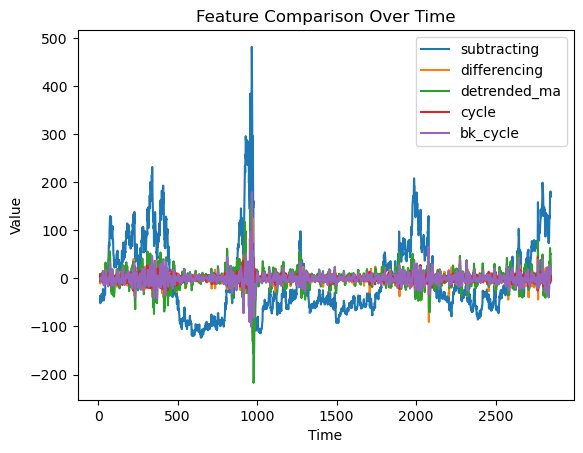

In [175]:
plt.plot(hy_df.index, hy_df['subtracting'], label='subtracting')
plt.plot(hy_df.index, hy_df['differencing'], label='differencing')
plt.plot(hy_df.index, hy_df['detrended_ma'], label='detrended_ma')
plt.plot(hy_df.index, hy_df['cycle'], label='cycle')
plt.plot(hy_df.index, hy_df['bk_cycle'], label='bk_cycle')
plt.title('Feature Comparison Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [176]:
dickey=adfuller(hy_df['CDX HY Spread'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.243159
p-value: 0.017619
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [177]:
dickey=adfuller(hy_df['subtracting'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.232608
p-value: 0.018173
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [178]:
dickey=adfuller(hy_df['differencing'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.791184
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [179]:
dickey=adfuller(hy_df['differencing'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.791184
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [180]:
dickey=adfuller(hy_df['detrended_ma'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.252219
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [181]:
dickey=adfuller(hy_df['cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.947857
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [182]:
dickey=adfuller(hy_df['bk_cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.734880
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


# IG

<AxesSubplot:>

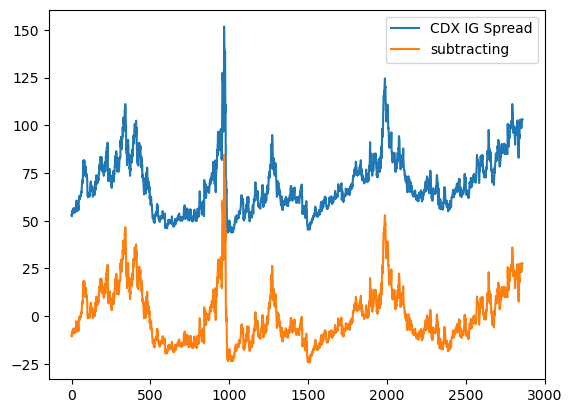

In [78]:
trend_model = np.polyfit(x=np.arange(len(ig_df)), y=ig_df['CDX IG Spread'], deg=1)

trend = np.polyval(p=trend_model, x=np.arange(len(ig_df)))

ig_df['subtracting'] = ig_df['CDX IG Spread'] - trend

ig_df[['CDX IG Spread', 'subtracting']].plot()

<AxesSubplot:>

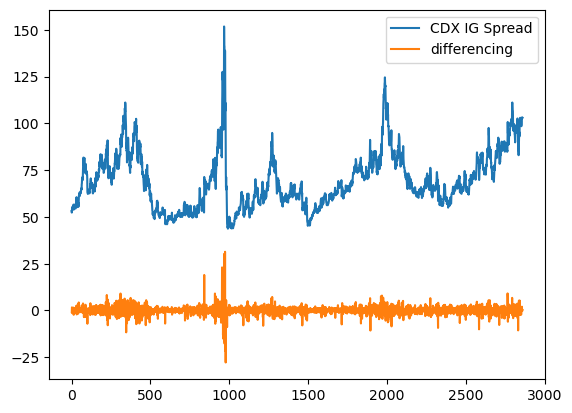

In [79]:
ig_df['differencing'] = ig_df['CDX IG Spread'].diff()

# For second-order differencing, you could do a diff of the diff:
# df['second_order_diff'] = df['value'].diff().diff()

# Plotting (optional)
ig_df[['CDX IG Spread', 'differencing']].plot()


<AxesSubplot:>

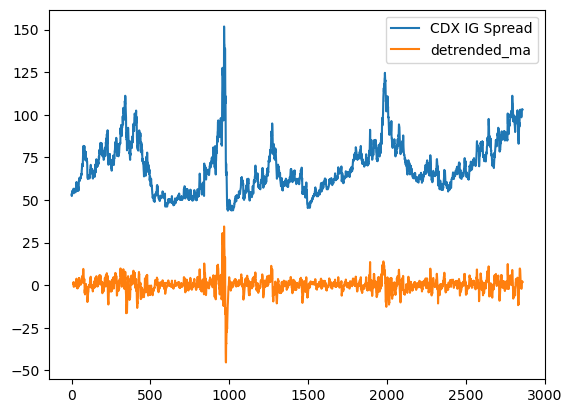

In [80]:
window = 12  # Adjust based on your dataset
ig_df['moving_avg'] = ig_df['CDX IG Spread'].rolling(window=window).mean()

ig_df['detrended_ma'] = ig_df['CDX IG Spread'] - ig_df['moving_avg']

ig_df[['CDX IG Spread', 'detrended_ma']].plot()

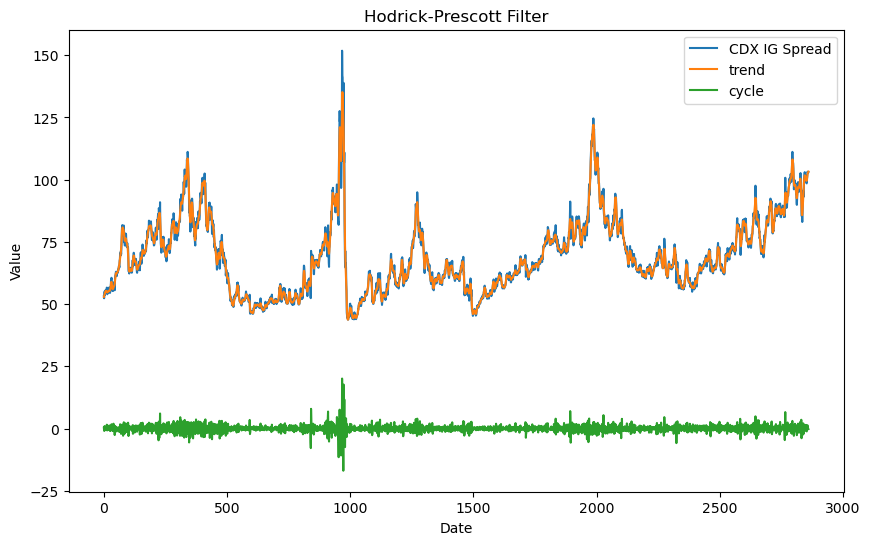

In [127]:
cycle, trend = sm.tsa.filters.hpfilter(ig_df['CDX IG Spread'], lamb=6.25)
#1600 for quarterly, 6400 for annual, and around 6.25 for monthly data.

# Adding the results back to the DataFrame
ig_df['trend'] = trend
ig_df['cycle'] = cycle

# You can plot the original data, the trend, and the cycle
ig_df[['CDX IG Spread', 'trend', 'cycle']].plot(figsize=(10, 6), title='Hodrick-Prescott Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

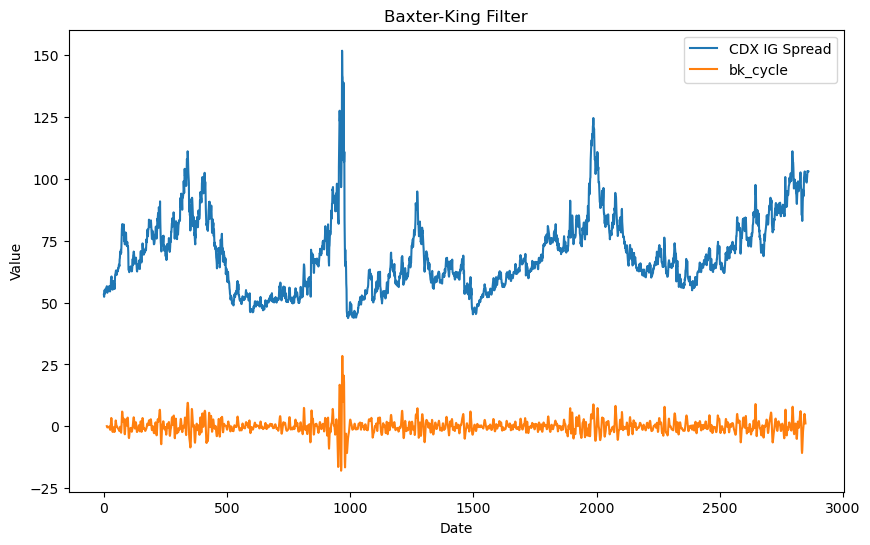

In [128]:
# Baxter-King filter to extract cyclical movements
bk_cycle = sm.tsa.filters.bkfilter(ig_df['CDX IG Spread'], low=6, high=32, K=12)

# The BK filter returns an array, so let's add it back to the DataFrame
ig_df['bk_cycle'] = bk_cycle

# Plot the original data and the extracted cycle
ig_df[['CDX IG Spread', 'bk_cycle']].plot(figsize=(10, 6), title='Baxter-King Filter')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [96]:
ig_df

,CDX IG Spread,subtracting,differencing,moving_avg,detrended_ma
0,53.184,-9.808915,NaN,NaN,NaN
1,52.343,-10.654270,-0.841,NaN,NaN
2,54.015,-8.986626,1.672,NaN,NaN
3,55.056,-7.949982,1.041,NaN,NaN
4,53.619,-9.391337,-1.437,NaN,NaN
...,...,...,...,...,...
2856,103.152,27.719287,2.027,100.669000,2.483000
2857,103.000,27.562932,-0.152,100.669000,2.331000
2858,102.750,27.308576,-0.250,100.825167,1.924833
2859,102.751,27.305220,0.001,100.971083,1.779917


In [183]:
ig_df=ig_df.dropna()

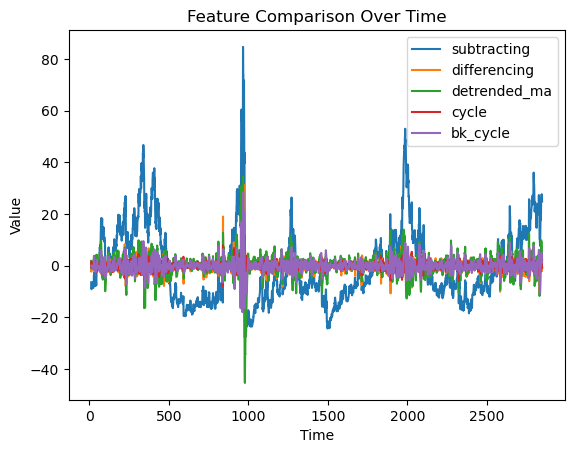

In [184]:
plt.plot(ig_df.index, ig_df['subtracting'], label='subtracting')
plt.plot(ig_df.index, ig_df['differencing'], label='differencing')
plt.plot(ig_df.index, ig_df['detrended_ma'], label='detrended_ma')
plt.plot(ig_df.index, ig_df['cycle'], label='cycle')
plt.plot(ig_df.index, ig_df['bk_cycle'], label='bk_cycle')
plt.title('Feature Comparison Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [185]:
dickey=adfuller(ig_df['CDX IG Spread'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.305936
p-value: 0.014615
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [186]:
dickey=adfuller(ig_df['subtracting'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.472169
p-value: 0.008731
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [187]:
dickey=adfuller(ig_df['differencing'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.119262
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [188]:
dickey=adfuller(ig_df['detrended_ma'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.582960
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [189]:
dickey=adfuller(ig_df['cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.678913
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [190]:
dickey=adfuller(ig_df['bk_cycle'])
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.650151
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
